### Machine Learning Essentials CSE-1015

#### Lab - 4
Pinni Venkata Abhiram
20BAI1132

In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression as linearreg
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from tabulate import tabulate
from sklearn import metrics

#### Ignoring warnings 

In [181]:
warnings.filterwarnings('ignore')

### Preprocessing the data for train set

In [182]:
df = pd.read_csv('Lab-CSE1015-Data_Regression-train.csv')

In [183]:
df.columns

Index(['Sample No', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8',
       'Unnamed: 9', 'R1', 'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')

In [184]:
df.head(10)

,Sample No,P1,P2,P3,P4,P5,P6,P7,P8,Unnamed: 9,R1,Unnamed: 11,Unnamed: 12
0,1.0,0.01,0.0483,0.8728,0.000435,0.01,0.0483,0.8728,0.000435,NaN,0.023,NaN,NaN
1,2.0,0.01,0.0483,0.8728,0.000435,0.01,0.0483,0.8728,0.000435,NaN,0.008,NaN,NaN
2,3.0,0.01,0.0483,0.8728,0.000435,0.01,0.0483,0.8728,0.000435,NaN,0.014,NaN,NaN
3,4.0,0.01,0.0483,0.8728,0.000435,0.01,0.0483,0.8728,0.000435,NaN,0.011,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6.0,0.01,0.0483,0.8728,0.000435,0.01,0.0483,0.8728,0.000435,NaN,0.007,NaN,NaN
6,7.0,0.01,0.0483,0.8728,0.000435,0.01,0.0483,0.8728,0.000435,NaN,0.027,NaN,NaN
7,8.0,0.01,0.0483,0.8728,0.000435,0.01,0.0483,0.8728,0.000435,NaN,0.029,NaN,NaN
8,9.0,0.01,0.0483,0.8728,0.000435,0.01,0.0483,0.8728,0.000435,NaN,0.015,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sample No    80 non-null     float64
 1   P1           80 non-null     float64
 2   P2           80 non-null     float64
 3   P3           80 non-null     float64
 4   P4           80 non-null     float64
 5   P5           80 non-null     float64
 6   P6           80 non-null     float64
 7   P7           80 non-null     float64
 8   P8           80 non-null     float64
 9   Unnamed: 9   0 non-null      float64
 10  R1           80 non-null     float64
 11  Unnamed: 11  0 non-null      float64
 12  Unnamed: 12  0 non-null      float64
dtypes: float64(13)
memory usage: 10.2 KB


In [186]:
df.describe()

,Sample No,P1,P2,P3,P4,P5,P6,P7,P8,Unnamed: 9,R1,Unnamed: 11,Unnamed: 12
count,80.000000,80.00,80.000000,80.000000,80.000000,80.00,80.000000,80.000000,80.000000,0.0,80.000000,0.0,0.0
mean,50.000000,0.01,0.049910,0.894570,0.000471,0.01,0.054869,0.920611,0.000583,NaN,0.015900,NaN,NaN
std,29.035116,0.00,0.002208,0.029855,0.000050,0.00,0.006751,0.032978,0.000138,NaN,0.007653,NaN,NaN
min,1.000000,0.01,0.048300,0.872800,0.000435,0.01,0.048300,0.872800,0.000435,NaN,0.002000,NaN,NaN
25%,25.500000,0.01,0.048300,0.872800,0.000435,0.01,0.048300,0.872800,0.000435,NaN,0.009750,NaN,NaN
50%,50.000000,0.01,0.048300,0.872800,0.000435,0.01,0.052900,0.935000,0.000539,NaN,0.016000,NaN,NaN
75%,74.500000,0.01,0.052900,0.935000,0.000539,0.01,0.057500,0.947000,0.000694,NaN,0.022000,NaN,NaN
max,99.000000,0.01,0.052900,0.935000,0.000539,0.01,0.068200,0.951300,0.000817,NaN,0.030000,NaN,NaN


In [187]:
def maximum_absolute_scaling(dataFrame):
    dataFrame_scaled = dataFrame.copy()
    for column in dataFrame_scaled.columns:
        dataFrame_scaled[column] = dataFrame_scaled[column]  / dataFrame_scaled[column].abs().max()
    return dataFrame_scaled
    
# call the maximum_absolute_scaling function
df_scaled = maximum_absolute_scaling(df)

df_scaled

,Sample No,P1,P2,P3,P4,P5,P6,P7,P8,Unnamed: 9,R1,Unnamed: 11,Unnamed: 12
0,0.010101,1.0,0.913043,0.933476,0.80705,1.0,0.708211,0.917481,0.532436,NaN,0.766667,NaN,NaN
1,0.020202,1.0,0.913043,0.933476,0.80705,1.0,0.708211,0.917481,0.532436,NaN,0.266667,NaN,NaN
2,0.030303,1.0,0.913043,0.933476,0.80705,1.0,0.708211,0.917481,0.532436,NaN,0.466667,NaN,NaN
3,0.040404,1.0,0.913043,0.933476,0.80705,1.0,0.708211,0.917481,0.532436,NaN,0.366667,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,0.969697,1.0,1.000000,1.000000,1.00000,1.0,0.775660,0.982866,0.659731,NaN,0.066667,NaN,NaN
96,0.979798,1.0,1.000000,1.000000,1.00000,1.0,0.843109,0.995480,0.849449,NaN,0.433333,NaN,NaN
97,0.989899,1.0,1.000000,1.000000,1.00000,1.0,0.843109,0.995480,0.849449,NaN,0.600000,NaN,NaN


In [188]:
df_scaled.columns

Index(['Sample No', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8',
       'Unnamed: 9', 'R1', 'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')

#### Normalisation of data

In [189]:
df_scaled = df_scaled.dropna(how='all')
df_scaled

,Sample No,P1,P2,P3,P4,P5,P6,P7,P8,Unnamed: 9,R1,Unnamed: 11,Unnamed: 12
0,0.010101,1.0,0.913043,0.933476,0.80705,1.0,0.708211,0.917481,0.532436,NaN,0.766667,NaN,NaN
1,0.020202,1.0,0.913043,0.933476,0.80705,1.0,0.708211,0.917481,0.532436,NaN,0.266667,NaN,NaN
2,0.030303,1.0,0.913043,0.933476,0.80705,1.0,0.708211,0.917481,0.532436,NaN,0.466667,NaN,NaN
3,0.040404,1.0,0.913043,0.933476,0.80705,1.0,0.708211,0.917481,0.532436,NaN,0.366667,NaN,NaN
5,0.060606,1.0,0.913043,0.933476,0.80705,1.0,0.708211,0.917481,0.532436,NaN,0.233333,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0.949495,1.0,1.000000,1.000000,1.00000,1.0,0.775660,0.982866,0.659731,NaN,0.666667,NaN,NaN
95,0.969697,1.0,1.000000,1.000000,1.00000,1.0,0.775660,0.982866,0.659731,NaN,0.066667,NaN,NaN
96,0.979798,1.0,1.000000,1.000000,1.00000,1.0,0.843109,0.995480,0.849449,NaN,0.433333,NaN,NaN
97,0.989899,1.0,1.000000,1.000000,1.00000,1.0,0.843109,0.995480,0.849449,NaN,0.600000,NaN,NaN


#### Data Cleaning

#### Dropping all columns with NaN

In [190]:
df_scaled = df_scaled.dropna(axis=1, how='all')
df_scaled

,Sample No,P1,P2,P3,P4,P5,P6,P7,P8,R1
0,0.010101,1.0,0.913043,0.933476,0.80705,1.0,0.708211,0.917481,0.532436,0.766667
1,0.020202,1.0,0.913043,0.933476,0.80705,1.0,0.708211,0.917481,0.532436,0.266667
2,0.030303,1.0,0.913043,0.933476,0.80705,1.0,0.708211,0.917481,0.532436,0.466667
3,0.040404,1.0,0.913043,0.933476,0.80705,1.0,0.708211,0.917481,0.532436,0.366667
5,0.060606,1.0,0.913043,0.933476,0.80705,1.0,0.708211,0.917481,0.532436,0.233333
...,...,...,...,...,...,...,...,...,...,...
93,0.949495,1.0,1.000000,1.000000,1.00000,1.0,0.775660,0.982866,0.659731,0.666667
95,0.969697,1.0,1.000000,1.000000,1.00000,1.0,0.775660,0.982866,0.659731,0.066667
96,0.979798,1.0,1.000000,1.000000,1.00000,1.0,0.843109,0.995480,0.849449,0.433333
97,0.989899,1.0,1.000000,1.000000,1.00000,1.0,0.843109,0.995480,0.849449,0.600000


#### Checking if any column with NaN exists or not

In [191]:
df_scaled.isnull().sum()

Sample No    0
P1           0
P2           0
P3           0
P4           0
P5           0
P6           0
P7           0
P8           0
R1           0
dtype: int64

In [192]:
df_scaled.columns

Index(['Sample No', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'R1'], dtype='object')

#### Finding Correlation for testing dataset

In [193]:
correlation = df.corr()
correlation['R1']

Sample No     -0.094219
P1                  NaN
P2            -0.152310
P3            -0.152310
P4            -0.152310
P5                  NaN
P6             0.142548
P7             0.044616
P8             0.122480
Unnamed: 9          NaN
R1             1.000000
Unnamed: 11         NaN
Unnamed: 12         NaN
Name: R1, dtype: float64

#### The input variables P6 and P8 have a positive correlation with R1 which means the values of the input variable and the output variable change in the same direction.

#### The correlation between P7 and R1 is 0.044 which is not significant, hence P7 can be dropped.

#### The input variables P2, P3 and P4 have a negative correlation with R1 which means the values of the input variable and the output variable change in the opposite directions.

#### The predictor variables P1 and P5 doesn't have a definite correlation with the output variable R1, hence, these can be dropped.

### Preprocessing for the test dataset

In [194]:
df2 = pd.read_csv('Lab-CSE1015-Data_Regression-test.csv')

In [195]:
df2.head(10)

,Sample No,P1,P2,P3,P4,P5,P6,P7,P8,Unnamed: 9,R1,Unnamed: 11,Unnamed: 12
0,5,0.01,0.0483,0.8728,0.000435,0.01,0.0483,0.8728,0.000435,NaN,0.027,NaN,NaN
1,10,0.01,0.0483,0.8728,0.000435,0.01,0.0483,0.8728,0.000435,NaN,0.003,NaN,NaN
2,15,0.01,0.0483,0.8728,0.000435,0.01,0.0483,0.8728,0.000435,NaN,0.012,NaN,NaN
3,20,0.01,0.0483,0.8728,0.000435,0.01,0.0529,0.9350,0.000539,NaN,0.026,NaN,NaN
4,25,0.01,0.0483,0.8728,0.000435,0.01,0.0529,0.9350,0.000539,NaN,0.025,NaN,NaN
5,30,0.01,0.0483,0.8728,0.000435,0.01,0.0529,0.9350,0.000539,NaN,0.026,NaN,NaN
6,35,0.01,0.0483,0.8728,0.000435,0.01,0.0575,0.9470,0.000694,NaN,0.022,NaN,NaN
7,40,0.01,0.0483,0.8728,0.000435,0.01,0.0575,0.9470,0.000694,NaN,0.025,NaN,NaN
8,45,0.01,0.0483,0.8728,0.000435,0.01,0.0575,0.9470,0.000694,NaN,0.004,NaN,NaN
9,50,0.01,0.0483,0.8728,0.000435,0.01,0.0682,0.9513,0.000817,NaN,0.013,NaN,NaN


In [196]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sample No    20 non-null     int64  
 1   P1           20 non-null     float64
 2   P2           20 non-null     float64
 3   P3           20 non-null     float64
 4   P4           20 non-null     float64
 5   P5           20 non-null     float64
 6   P6           20 non-null     float64
 7   P7           20 non-null     float64
 8   P8           20 non-null     float64
 9   Unnamed: 9   0 non-null      float64
 10  R1           20 non-null     float64
 11  Unnamed: 11  0 non-null      float64
 12  Unnamed: 12  0 non-null      float64
dtypes: float64(12), int64(1)
memory usage: 2.2 KB


In [197]:
df2.describe()

,Sample No,P1,P2,P3,P4,P5,P6,P7,P8,Unnamed: 9,R1,Unnamed: 11,Unnamed: 12
count,20.000000,2.000000e+01,20.000000,20.000000,20.000000,2.000000e+01,20.000000,20.000000,20.000000,0.0,20.00000,0.0,0.0
mean,52.500000,1.000000e-02,0.050140,0.897680,0.000477,1.000000e-02,0.054505,0.918075,0.000575,NaN,0.01690,NaN,NaN
std,29.580399,1.779789e-18,0.002312,0.031263,0.000052,1.779789e-18,0.006819,0.034585,0.000141,NaN,0.00947,NaN,NaN
min,5.000000,1.000000e-02,0.048300,0.872800,0.000435,1.000000e-02,0.048300,0.872800,0.000435,NaN,0.00100,NaN,NaN
25%,28.750000,1.000000e-02,0.048300,0.872800,0.000435,1.000000e-02,0.048300,0.872800,0.000435,NaN,0.01000,NaN,NaN
50%,52.500000,1.000000e-02,0.048300,0.872800,0.000435,1.000000e-02,0.052900,0.935000,0.000539,NaN,0.02100,NaN,NaN
75%,76.250000,1.000000e-02,0.052900,0.935000,0.000539,1.000000e-02,0.057500,0.947000,0.000694,NaN,0.02500,NaN,NaN
max,100.000000,1.000000e-02,0.052900,0.935000,0.000539,1.000000e-02,0.068200,0.951300,0.000817,NaN,0.02800,NaN,NaN


In [198]:
df2_scaled = maximum_absolute_scaling(df2)
df2_scaled

,Sample No,P1,P2,P3,P4,P5,P6,P7,P8,Unnamed: 9,R1,Unnamed: 11,Unnamed: 12
0,0.05,1.0,0.913043,0.933476,0.80705,1.0,0.708211,0.917481,0.532436,NaN,0.964286,NaN,NaN
1,0.10,1.0,0.913043,0.933476,0.80705,1.0,0.708211,0.917481,0.532436,NaN,0.107143,NaN,NaN
2,0.15,1.0,0.913043,0.933476,0.80705,1.0,0.708211,0.917481,0.532436,NaN,0.428571,NaN,NaN
3,0.20,1.0,0.913043,0.933476,0.80705,1.0,0.775660,0.982866,0.659731,NaN,0.928571,NaN,NaN
4,0.25,1.0,0.913043,0.933476,0.80705,1.0,0.775660,0.982866,0.659731,NaN,0.892857,NaN,NaN
5,0.30,1.0,0.913043,0.933476,0.80705,1.0,0.775660,0.982866,0.659731,NaN,0.928571,NaN,NaN
6,0.35,1.0,0.913043,0.933476,0.80705,1.0,0.843109,0.995480,0.849449,NaN,0.785714,NaN,NaN
7,0.40,1.0,0.913043,0.933476,0.80705,1.0,0.843109,0.995480,0.849449,NaN,0.892857,NaN,NaN
8,0.45,1.0,0.913043,0.933476,0.80705,1.0,0.843109,0.995480,0.849449,NaN,0.142857,NaN,NaN
9,0.50,1.0,0.913043,0.933476,0.80705,1.0,1.000000,1.000000,1.000000,NaN,0.464286,NaN,NaN


#### Data Cleaning for test dataset

In [199]:
df2_scaled.isnull().sum()

Sample No       0
P1              0
P2              0
P3              0
P4              0
P5              0
P6              0
P7              0
P8              0
Unnamed: 9     20
R1              0
Unnamed: 11    20
Unnamed: 12    20
dtype: int64

#### Dropping all the columns with a null value

In [200]:
df2_scaled = df2_scaled.dropna(axis =  1, how='all')
df2_scaled

,Sample No,P1,P2,P3,P4,P5,P6,P7,P8,R1
0,0.05,1.0,0.913043,0.933476,0.80705,1.0,0.708211,0.917481,0.532436,0.964286
1,0.10,1.0,0.913043,0.933476,0.80705,1.0,0.708211,0.917481,0.532436,0.107143
2,0.15,1.0,0.913043,0.933476,0.80705,1.0,0.708211,0.917481,0.532436,0.428571
3,0.20,1.0,0.913043,0.933476,0.80705,1.0,0.775660,0.982866,0.659731,0.928571
4,0.25,1.0,0.913043,0.933476,0.80705,1.0,0.775660,0.982866,0.659731,0.892857
5,0.30,1.0,0.913043,0.933476,0.80705,1.0,0.775660,0.982866,0.659731,0.928571
6,0.35,1.0,0.913043,0.933476,0.80705,1.0,0.843109,0.995480,0.849449,0.785714
7,0.40,1.0,0.913043,0.933476,0.80705,1.0,0.843109,0.995480,0.849449,0.892857
8,0.45,1.0,0.913043,0.933476,0.80705,1.0,0.843109,0.995480,0.849449,0.142857
9,0.50,1.0,0.913043,0.933476,0.80705,1.0,1.000000,1.000000,1.000000,0.464286


#### Checking for count of null values again to check if code worked 

In [201]:
df2_scaled.isnull().sum()

Sample No    0
P1           0
P2           0
P3           0
P4           0
P5           0
P6           0
P7           0
P8           0
R1           0
dtype: int64

#### Correlation for the Train dataset is found now we drop the unnessecary columns

In [202]:
df_scaled_new = df_scaled.drop(['P1', 'P5', 'P7'],axis=1)
df_scaled_new

,Sample No,P2,P3,P4,P6,P8,R1
0,0.010101,0.913043,0.933476,0.80705,0.708211,0.532436,0.766667
1,0.020202,0.913043,0.933476,0.80705,0.708211,0.532436,0.266667
2,0.030303,0.913043,0.933476,0.80705,0.708211,0.532436,0.466667
3,0.040404,0.913043,0.933476,0.80705,0.708211,0.532436,0.366667
5,0.060606,0.913043,0.933476,0.80705,0.708211,0.532436,0.233333
...,...,...,...,...,...,...,...
93,0.949495,1.000000,1.000000,1.00000,0.775660,0.659731,0.666667
95,0.969697,1.000000,1.000000,1.00000,0.775660,0.659731,0.066667
96,0.979798,1.000000,1.000000,1.00000,0.843109,0.849449,0.433333
97,0.989899,1.000000,1.000000,1.00000,0.843109,0.849449,0.600000


In [203]:
df_scaled_new.columns

Index(['Sample No', 'P2', 'P3', 'P4', 'P6', 'P8', 'R1'], dtype='object')

#### Heatmap for correlation

<AxesSubplot:>

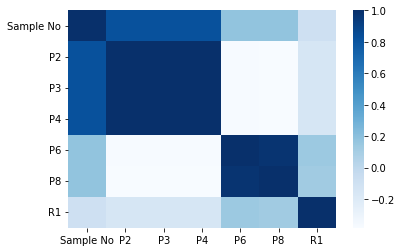

In [204]:
sns.heatmap(df_scaled_new.corr() , cmap="Blues")

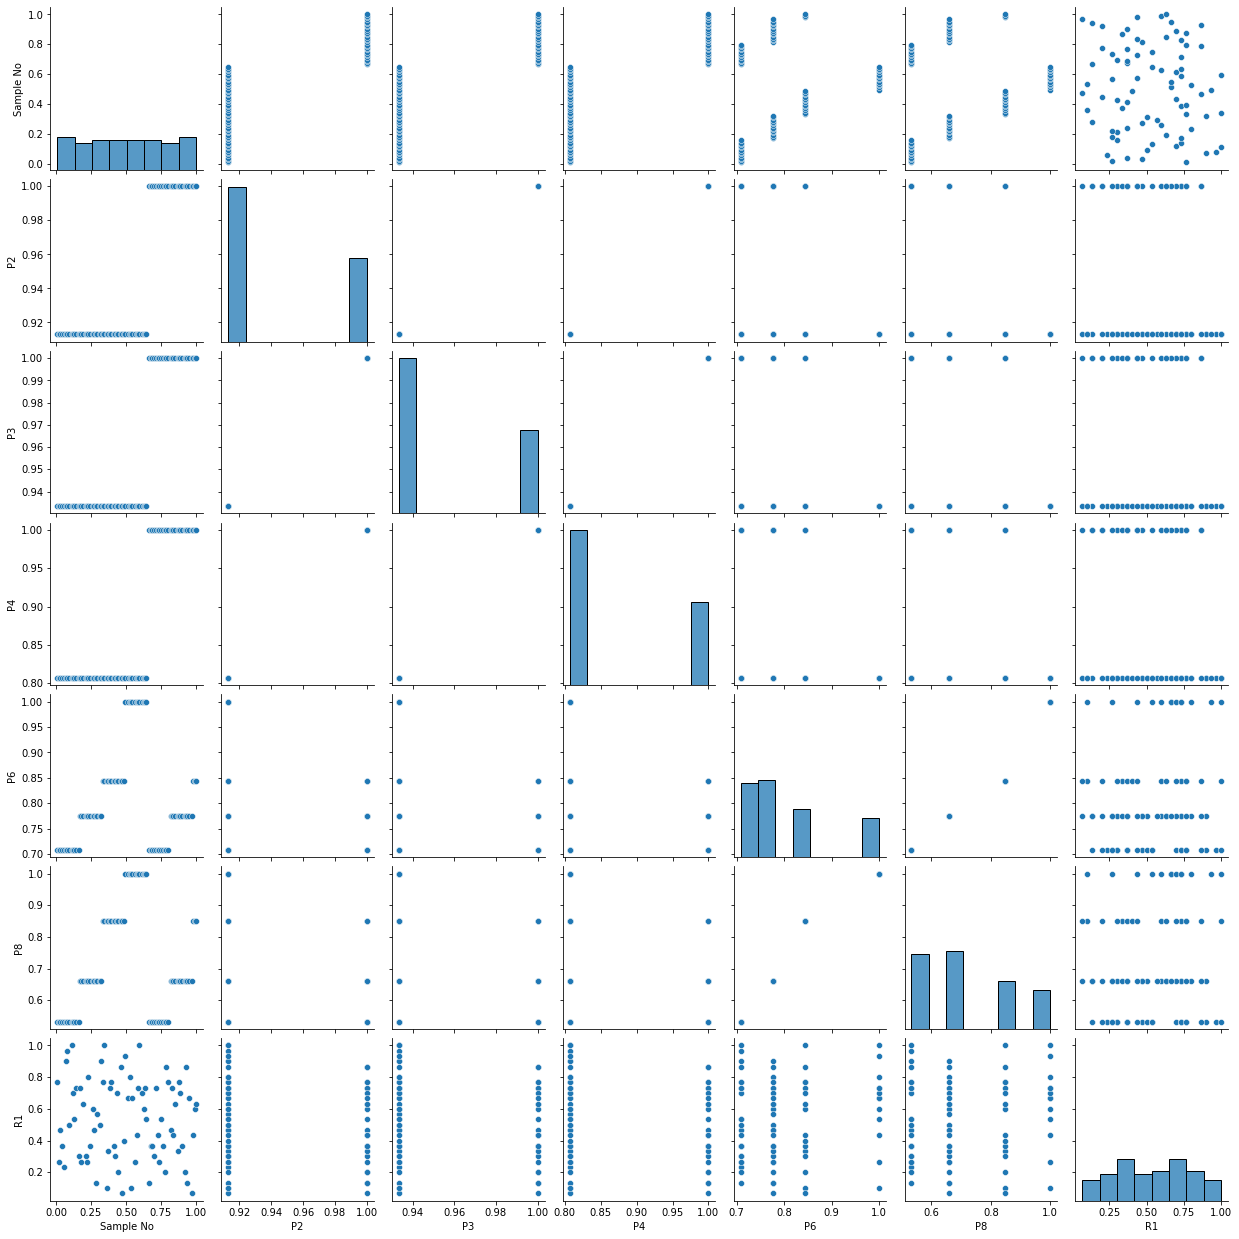

In [205]:
sns.pairplot(df_scaled_new)

#### Building the regression Model

In [206]:
X = df_scaled_new.drop(['Sample No','R1'],axis=1)
Y = df_scaled_new['R1']

In [207]:
X.head

<bound method NDFrame.head of           P2        P3       P4        P6        P8
0   0.913043  0.933476  0.80705  0.708211  0.532436
1   0.913043  0.933476  0.80705  0.708211  0.532436
2   0.913043  0.933476  0.80705  0.708211  0.532436
3   0.913043  0.933476  0.80705  0.708211  0.532436
5   0.913043  0.933476  0.80705  0.708211  0.532436
..       ...       ...      ...       ...       ...
93  1.000000  1.000000  1.00000  0.775660  0.659731
95  1.000000  1.000000  1.00000  0.775660  0.659731
96  1.000000  1.000000  1.00000  0.843109  0.849449
97  1.000000  1.000000  1.00000  0.843109  0.849449
98  1.000000  1.000000  1.00000  0.843109  0.849449

[80 rows x 5 columns]>

In [208]:
Y.head

<bound method NDFrame.head of 0     0.766667
1     0.266667
2     0.466667
3     0.366667
5     0.233333
        ...   
93    0.666667
95    0.066667
96    0.433333
97    0.600000
98    0.633333
Name: R1, Length: 80, dtype: float64>

In [209]:
linear_reg_model = linearreg()

In [210]:
linear_reg_model.fit(X,Y)

LinearRegression()

In [211]:
intercept = linear_reg_model.intercept_
intercept

-29078067853304.48

In [212]:
coefficients = pd.DataFrame(linear_reg_model.coef_, X.columns, columns = ['coef']).sort_values(by = 'coef', ascending = False)
coefficients

,coef
P3,3.584173e+13
P2,1.018261e+13
P6,1.166016e+00
P8,-5.507812e-01
P4,-1.694627e+13


In [213]:
reg_equation = "Y = " + str(intercept.round(5)) + " + "
reg_equation += "(" + str(coefficients.coef['P2'].round(5)) + ")" + X.columns[0]
for i in range(1, len(X.columns)):
    col = X.columns[i]
    reg_equation += " + (" + str(coefficients.coef[col].round(5)) + ")" + col
print(reg_equation)

Y = -29078067853304.48 + (10182614506911.0)P2 + (35841728243657.766)P3 + (-16946274897264.34)P4 + (1.16602)P6 + (-0.55078)P8


#### From the regression equation, it is evident that the variables P2, P3, P4 and P8 move in opposite direction as compared to Y since they have the negative correlation coefficient. the variables P6 move in the same direction as compared to Y since they have the positive correlation coefficient. the intercept is the expected mean value of Y when all X = 0. therefore, here, the expected mean value of Y will be 0.02736 when P2, P3, P4, P6 and P8 are zero.

In [214]:
result = sm.OLS(Y, X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     R1   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.008
Date:                Sun, 06 Feb 2022   Prob (F-statistic):              0.394
Time:                        15:43:36   Log-Likelihood:                -2.1650
No. Observations:                  80   AIC:                             12.33
Df Residuals:                      76   BIC:                             21.86
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
P2             0.1609      0.423      0.381      0.7

        
#### Based off of the VIF Values, we drop the ones with the highest VIF values and so 'P2' is dropped. 

#### Drop unnecessary input variables

In [215]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif  = pd.DataFrame()
vif['variables'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,variables,VIF
0,P2,inf
1,P3,inf
2,P4,inf
3,P6,19.885930
4,P8,19.991631


In [216]:
X = X.drop(columns='P2')

In [217]:
vif  = pd.DataFrame()
vif['variables'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,variables,VIF
0,P3,1060.747692
1,P4,331.993625
2,P6,19.885930
3,P8,19.991631


In [218]:
X = X.drop(columns='P3')

In [219]:
vif  = pd.DataFrame()
vif['variables'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,variables,VIF
0,P4,74.031289
1,P6,446.026777
2,P8,193.306107


In [222]:
X = X.drop('P6',axis=1)

In [223]:
vif  = pd.DataFrame()
vif['variables'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,variables,VIF
0,P4,12.39954
1,P8,12.39954


In [225]:
import statsmodels.api as sm
result = sm.OLS(Y, X).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                     R1   R-squared (uncentered):                   0.809
Model:                            OLS   Adj. R-squared (uncentered):              0.804
Method:                 Least Squares   F-statistic:                              165.4
Date:                Sun, 06 Feb 2022   Prob (F-statistic):                    8.78e-29
Time:                        15:45:21   Log-Likelihood:                         -4.7071
No. Observations:                  80   AIC:                                      13.41
Df Residuals:                      78   BIC:                                      18.18
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [227]:
regression_model = linearreg()
regression_model.fit(X,Y)
print("Intercept: ",regression_model.intercept_)
print("Coefficient: ",regression_model.coef_)

x_train = np.column_stack((X['P4'],X['P8'])) 
y_train = Y
x_train = sm.add_constant(x_train)
estimate = sm.OLS(y_train, x_train).fit()
print(estimate.summary())

Intercept:  0.7466663580133017
Coefficient:  [-0.34024107  0.11343782]
                            OLS Regression Results                            
Dep. Variable:                     R1   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.110
Date:                Sun, 06 Feb 2022   Prob (F-statistic):              0.335
Time:                        15:46:17   Log-Likelihood:                -2.5897
No. Observations:                  80   AIC:                             11.18
Df Residuals:                      77   BIC:                             18.33
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [244]:
print("Regression Equation: ")
yx = f"Y = {regression_model.intercept_.round(3)}+ ({regression_model.coef_[0].round(3)})P4 + ({regression_model.coef_[1].round(3)})P8"
print(yx)

Regression Equation: 
Y = 0.747+ (-0.34)P4 + (0.113)P8


In [229]:
result = sm.OLS(Y, X).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                     R1   R-squared (uncentered):                   0.809
Model:                            OLS   Adj. R-squared (uncentered):              0.804
Method:                 Least Squares   F-statistic:                              165.4
Date:                Sun, 06 Feb 2022   Prob (F-statistic):                    8.78e-29
Time:                        15:47:16   Log-Likelihood:                         -4.7071
No. Observations:                  80   AIC:                                      13.41
Df Residuals:                      78   BIC:                                      18.18
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Final Performance metrics

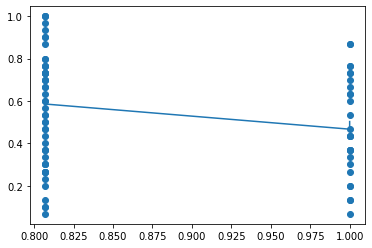

In [232]:
plt.scatter(X['P4'],Y)
eq = X*regression_model.coef_
eq = eq.sum(axis=1)+regression_model.intercept_
plt.plot(X['P4'], eq)

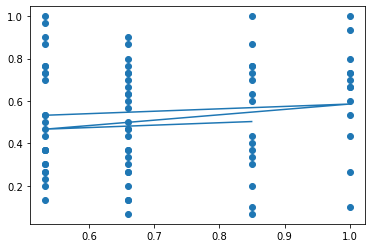

In [233]:
plt.scatter(X['P8'],Y)
eq = X*regression_model.coef_
eq = eq.sum(axis=1)+regression_model.intercept_
plt.plot(X['P8'], eq)

#### Comparision of Actual and Predicted results


In [234]:
X_test = df2_scaled[['P4', 'P8']]
Y_test = df2_scaled['R1']

In [235]:
predictions = regression_model.predict(X_test)
print(predictions)

[0.53247312 0.53247312 0.53247312 0.54691319 0.54691319 0.54691319
 0.56843444 0.56843444 0.56843444 0.58551259 0.58551259 0.58551259
 0.46682364 0.46682364 0.46682364 0.46682364 0.4812637  0.4812637
 0.4812637  0.50278495]


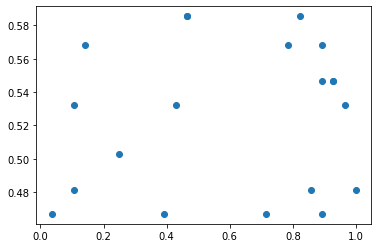

In [236]:
plt.scatter(Y_test, predictions)

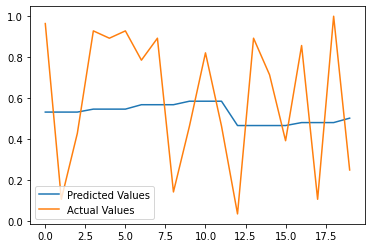

In [237]:
plt.plot(predictions, label = 'Predicted Values')
plt.plot(Y_test, label = 'Actual Values')
plt.legend()

In [240]:
predictions_list = predictions.tolist()
Y_test_list = Y_test.tolist()
print("Actual\tPredicted")
for i in range(len(Y_test_list)):
    print(Y_test_list[i], "\t" ,predictions_list[i])
#print(list(predictions))

Actual	Predicted
0.9642857142857143 	 0.5324731209466298
0.10714285714285714 	 0.5324731209466298
0.42857142857142855 	 0.5324731209466298
0.9285714285714285 	 0.5469131858498092
0.8928571428571429 	 0.5469131858498092
0.9285714285714285 	 0.5469131858498092
0.7857142857142857 	 0.5684344364266632
0.8928571428571429 	 0.5684344364266632
0.14285714285714285 	 0.5684344364266632
0.46428571428571425 	 0.5855125901102313
0.8214285714285714 	 0.5855125901102313
0.46428571428571425 	 0.5855125901102313
0.03571428571428571 	 0.46682363844590113
0.8928571428571429 	 0.46682363844590113
0.7142857142857143 	 0.46682363844590113
0.39285714285714285 	 0.46682363844590113
0.8571428571428571 	 0.48126370334908064
0.10714285714285714 	 0.48126370334908064
1.0 	 0.48126370334908064
0.25 	 0.5027849539259346


#### Summary and Tabulation of Data

In [242]:
MAE = metrics.mean_absolute_error(Y_test, predictions)
MSE = metrics.mean_squared_error(Y_test,predictions)
RMSE = np.sqrt(MSE)
R_squared = result.rsquared
adjusted_R_squared = result.rsquared_adj

In [245]:
table_testing = [
                ['Input Variable Names', 'Regression', 'MSE', 'MAE', 'RMSE', 'R-Squared', 'Adjusted R-Squared'],
                [[X.columns[0],X.columns[1]], yx, MSE, MAE, RMSE, R_squared, adjusted_R_squared]
                ]
print(tabulate(table_testing, headers='firstrow'))

Input Variable Names    Regression                             MSE       MAE      RMSE    R-Squared    Adjusted R-Squared
----------------------  --------------------------------  --------  --------  --------  -----------  --------------------
['P4', 'P8']            Y = 0.747+ (-0.34)P4 + (0.113)P8  0.112805  0.310802  0.335864     0.809189              0.804296
